In [1]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/cataisout/DS_Projects/main/Python/Machine%20Learning/Classification%20-%20In%20Progress/Hotel%20Reservations%20-%20In%20Progress/Hotel%20Reservations.csv'
df = pd.read_csv(url)

In [2]:
df.shape

(36275, 19)

In [3]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df.drop(columns = ['Booking_ID'], axis = 'columns', inplace = True) # ID não é relevante para o classificador

In [5]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
df.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [7]:
df.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [8]:
df.rename(columns = {'arrival_date' : 'arrival_day'}, inplace = True)
df.drop(columns = ['arrival_year'], axis = 'columns', inplace = True) # Ano não é muito relevante

In [9]:
troca = {
    'Not_Canceled' : 0,
    'Canceled' : 1
}

df['new_booking_status'] = df.booking_status.map(troca)


In [10]:
colunas_categoricas = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
colunas_a_trocar = df[colunas_categoricas]
dados_para_concat = df.drop(columns = colunas_categoricas)

In [11]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
colunas_transformadas = encoder.fit_transform(colunas_a_trocar)
encoder.categories_

[array(['Meal Plan 1', 'Meal Plan 2', 'Meal Plan 3', 'Not Selected'],
       dtype=object),
 array(['Room_Type 1', 'Room_Type 2', 'Room_Type 3', 'Room_Type 4',
        'Room_Type 5', 'Room_Type 6', 'Room_Type 7'], dtype=object),
 array(['Aviation', 'Complementary', 'Corporate', 'Offline', 'Online'],
       dtype=object)]

In [12]:
renomear = {0 : 'type_of_meal_plan', 1:'room_type_reserved', 2: 'market_segment_type'}
novas_colunas = pd.DataFrame(colunas_transformadas)
novas_colunas.rename(columns = renomear, inplace = True)

In [13]:
df_new = pd.concat([dados_para_concat, novas_colunas], axis = 1)
df_new.drop(columns = ['booking_status'], inplace = True)
df_new.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,arrival_day,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,new_booking_status,type_of_meal_plan,room_type_reserved,market_segment_type
0,2,0,1,2,0,224,10,2,0,0,0,65.00,0,0,0.0,0.0,3.0
1,2,0,2,3,0,5,11,6,0,0,0,106.68,1,0,3.0,0.0,4.0
2,1,0,2,1,0,1,2,28,0,0,0,60.00,0,1,0.0,0.0,4.0
3,2,0,0,2,0,211,5,20,0,0,0,100.00,0,1,0.0,0.0,4.0
4,2,0,1,1,0,48,4,11,0,0,0,94.50,0,1,3.0,0.0,4.0


C:\Users\cat13\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='new_booking_status', ylabel='count'>

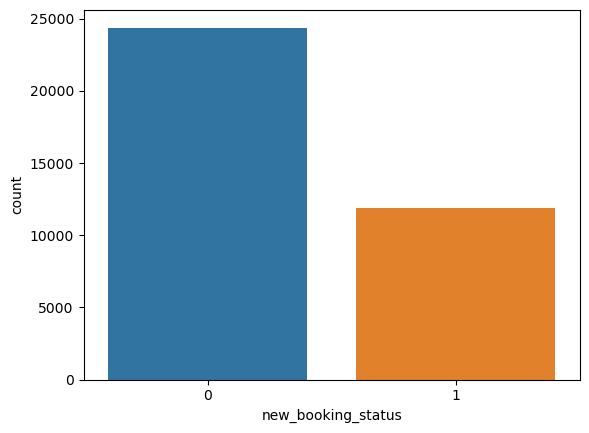

In [14]:
import seaborn as sns

sns.countplot(df_new.new_booking_status)

In [15]:
df_new.value_counts('new_booking_status', normalize = True) * 100

new_booking_status
0    67.236389
1    32.763611
dtype: float64

In [16]:
from imblearn.over_sampling import SMOTE

x = df_new.drop(columns = 'new_booking_status')
y = df_new['new_booking_status']

sm = SMOTE(random_state=42)
x, y = sm.fit_resample(x, y)

C:\Users\cat13\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='new_booking_status', ylabel='count'>

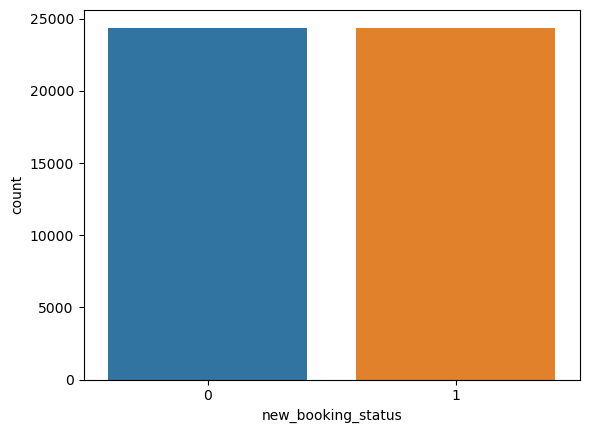

In [17]:
df_new = pd.concat([x, y], axis = 1)
sns.countplot(df_new.new_booking_status)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

SEED = 5
np.random.seed(SEED)

raw_x = df_new.drop(columns = 'new_booking_status')
y = df_new['new_booking_status']

#deixando os dados na mesma escala, pois o knn é sensível a valores muito diferentes
scaler = StandardScaler()
x = scaler.fit_transform(raw_x)

#dividindo treino e teste, sendo 75% dos dados para treino e 25% para teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25, stratify = y)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors=3, algorithm = 'kd_tree')  
# K padrao eh igual a 5
knn.fit(x_treino, y_treino)
previsao_knn = knn.predict(x_teste)

acuracia = accuracy_score(y_teste, previsao_knn) * 100
print("acuracia de %.2f%%" %acuracia)

C:\Users\cat13\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


acuracia de 86.39%


In [20]:
## Implementando Naive Bayes

from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB()
nb.fit(x_treino, y_treino)
previsao_bayes = nb.predict(x_teste)

acuracia = accuracy_score(y_teste, previsao_bayes) * 100
print("acuracia de %.2f%%" %acuracia)

acuracia de 76.33%


In [37]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=20)
tree.fit(x_treino, y_treino)
previsao_tree = tree.predict(x_teste)

acuracia = accuracy_score(y_teste, previsao_tree) * 100
print("acuracia de %.2f%%" %acuracia)

acuracia de 89.23%


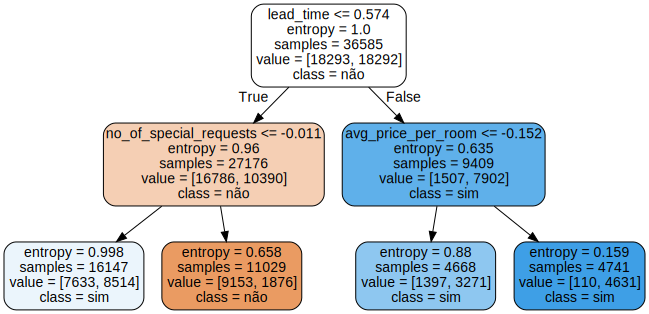

In [35]:
from sklearn.tree import export_graphviz
import graphviz


estimator = tree
features = raw_x.columns
dot_data = export_graphviz(estimator, out_file=None,
                           feature_names = features, 
                          filled = True, rounded = True,
                          class_names = ['não', "sim"])
grafico = graphviz.Source(dot_data)
grafico

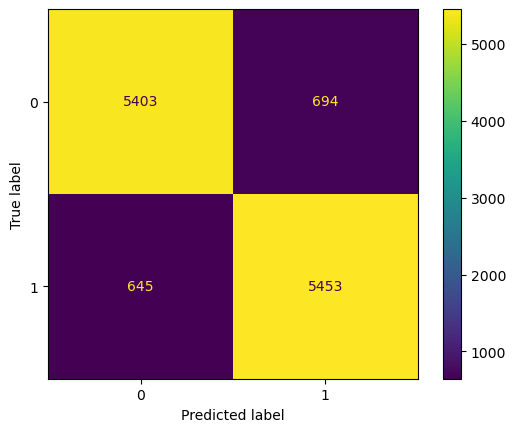

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_teste, previsao_tree)
ConfusionMatrixDisplay(cm).plot()

# Validação dos Modelos

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
previsoes = {'knn' : previsao_knn, 'Naive Bayes' : previsao_bayes, 'Árvore de Decisão': previsao_tree}

#Acurácia - Analisa desempenho de acertos verdadeiros, contabilizando TP e TN
#Precisao - Analisa acertos de positivos, contabilizando predição de verdadeiros e falsos positivos
#Recall - Analisa acerto de verdadeiros positivos, contabiliza positivos verdadeiros e falsos negativos
#f1 score -  é uma média harmônica entre o recall e a precisão

def imprime_metricas(previsoes):
    for algoritmo in list(previsoes.keys()):
        recall = recall_score(y_teste, previsoes[algoritmo]) *100
        acuracia = accuracy_score(y_teste, previsoes[algoritmo]) *100
        precisao = precision_score(y_teste, previsoes[algoritmo]) *100
        f1score = f1_score(y_teste, previsoes[algoritmo]) *100
        print("Algoritmo: ", algoritmo)
        print("\nAcurácia: %.2f%%" %acuracia)
        print("Precisão: %.2f%%" %precisao)
        print("Recall: %.2f%%" %recall)
        print("F1 Score: %.2f%%\n" %f1score)

imprime_metricas(previsoes)   

Algoritmo:  knn

Acurácia: 86.39%
Precisão: 85.80%
Recall: 87.21%
F1 Score: 86.50%

Algoritmo:  Naive Bayes

Acurácia: 76.33%
Precisão: 74.41%
Recall: 80.29%
F1 Score: 77.24%

Algoritmo:  Árvore de Decisão

Acurácia: 89.23%
Precisão: 88.76%
Recall: 89.85%
F1 Score: 89.30%



In [25]:
from sklearn.ensemble import RandomForestClassifier

x = df.drop(columns = 'new_booking_status')
y = df['new_booking_status']

forest = RandomForestClassifier()

forest.fit(x_treino, y_treino)
previsao_forest = forest.predict(x_teste)

acuracia_v1 = accuracy_score(y_teste, previsao_forest) * 100
print("acuracia de %.2f%%" %acuracia_v1)

acuracia de 92.17%


In [26]:
df.shape
#df possui 18 colunas, vamos tentar reduzir essa dimensionalidade

(36275, 18)

In [27]:
df = df.drop(columns = 'booking_status')

In [28]:
# Verificando se possui alguma coluna constante
colunas = list(df.columns)

for coluna in colunas:
    print(coluna, ":  ", df[coluna].nunique())
# nao há nenhuma coluna de valor constante

no_of_adults :   5
no_of_children :   6
no_of_weekend_nights :   8
no_of_week_nights :   18
type_of_meal_plan :   4
required_car_parking_space :   2
room_type_reserved :   7
lead_time :   352
arrival_month :   12
arrival_day :   31
market_segment_type :   5
repeated_guest :   2
no_of_previous_cancellations :   9
no_of_previous_bookings_not_canceled :   59
avg_price_per_room :   3930
no_of_special_requests :   6
new_booking_status :   2


<AxesSubplot:>

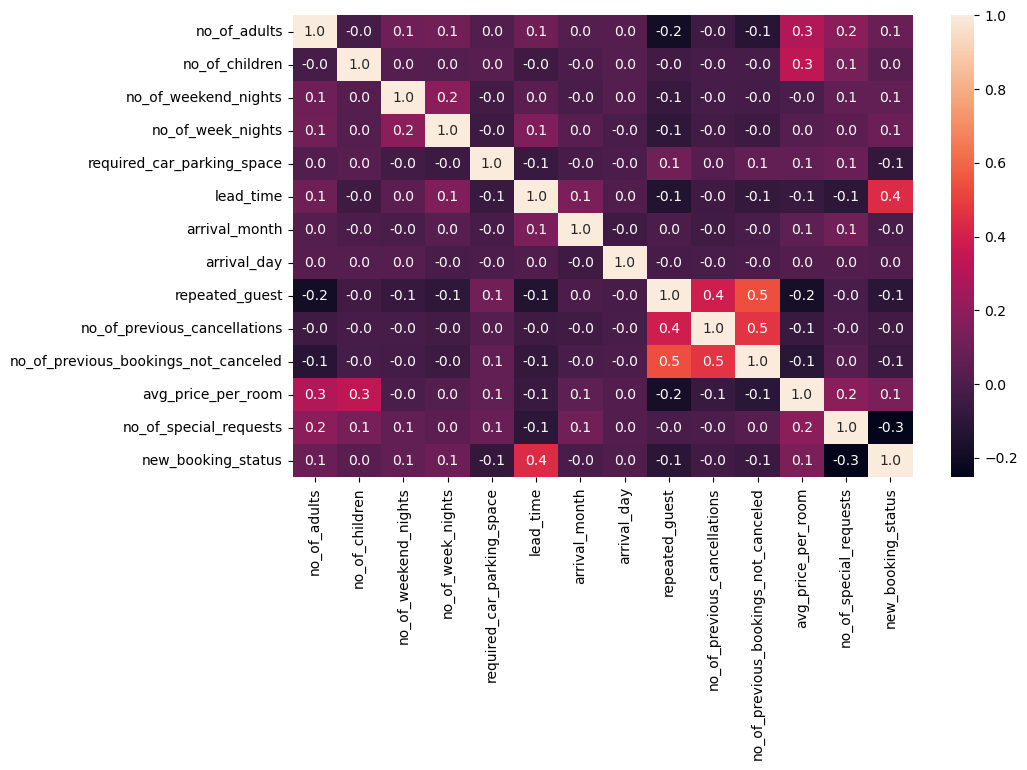

In [29]:
#verificando colunas com alta correlacao

corr = df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
sns.heatmap(corr, annot = True, fmt = ".1f")
# Não existem colunas com correlação relevante

In [30]:
from sklearn.feature_selection import RFE
from numpy import random

selecionador_rfe = RFE(estimator = classificador,step = 1,  n_features_to_select = 7)
selecionador_rfe.fit(x_treino, y_treino)

treino_rfe = selecionador_rfe.transform(x_treino)
teste_rfe = selecionador_rfe.transform(x_teste)

classificador.fit(treino_rfe, y_treino)



NameError: name 'classificador' is not defined

In [ ]:
df_RFE_results = []
for i in range(x.shape[1]):
    df_RFE_results.append(
        {      
            'Feature_names': list(x.columns)[i],
            'Selected':  selecionador_rfe.support_[i],
            'RFE_ranking':  selecionador_rfe.ranking_[i],
        }
    )

df_RFE_results = pd.DataFrame(df_RFE_results)
df_RFE_results.index.name='Columns'
colunas_mantidas = list(df_RFE_results[df_RFE_results['Selected'] == True].Feature_names)

x_otimizado = x[colunas_mantidas]

In [ ]:
# Desempenho com Feature Selection utilizando wrapper methods

from numpy import random

SEED= 5
random.seed(SEED)

x = x_otimizado
y = df_new['new_booking_status']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, stratify = y)


classificador = RandomForestClassifier(n_estimators = 100, random_state = 36)
classificador.fit(x_treino, y_treino)
classificador.score(x_teste, y_teste) * 100

In [ ]:
# Gerando modelo com menos nós (menor acuracia também),para fins de visualização

classificador = RandomForestClassifier(n_estimators = 100, random_state = 36, max_depth = 4)
classificador.fit(x_treino, y_treino)
classificador.score(x_teste, y_teste) * 100

In [ ]:
from sklearn.tree import export_graphviz
import graphviz


estimator = classificador.estimators_[5]
features = x.columns
dot_data = export_graphviz(estimator, out_file=None,
                           feature_names = features, 
                          filled = True, rounded = True,
                          class_names = ['não', "sim"])
grafico = graphviz.Source(dot_data)
grafico